# Introduction

### This data analysis task predicts the authenticity of some news articles. 

News come in different forms these days. It could be in the form of an article, video or an audio clip. With the advent of technology, news dissemination and access has been faster than usual as with just a click of a button or a swipe of a phone's screen, current or stale news can be sent and accessed from any part of the world. One of the challenges this has brought is the dissemination of information to serve the purpose of propaganda by an individual or organization. Even as technology has improved to disseminate news, it has also aided in telling genuine or fake. 

We would be taking a nose dive to detect fake and real news using python and its data science libraries. we would be making using of the [news](https://drive.google.com/file/d/1hWiXxCQ9SDlAkxClQLQZ_xmcU3TAOHb6/view) dataset

### Load the needed modules
numpy is needed for fundamental scientific computing.
pandas is needed for the data manipulation and analysis.
itertools is needed for providing various functions that work on iterators to produce complex iterators.
scikit-learn is needed for macjine learning.


In [39]:
import numpy as np
import pandas as pd


In [40]:
import os
# checking working directory
cwd = os.getcwd()
# Print the current working directory
print("Current working directory: {0}".format(cwd))

Current working directory: C:\Users\test\Documents\Github projects\novustack_mpd


### Import the dataset

The dataset has a dimension of 6335 rows by 4 columns. Although, the first is not very important as it identifies the news, the second and third represent the title and text, and the fourth column has labels denoting whether the news is REAL or FAKE.

In [41]:
#Read the data
df=pd.read_csv('news.csv')

#Get shape and head
df.shape
df.head()

#check data info
df.info()

#check for missing values.
pd.isnull(df)
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB
Unnamed: 0    0
title         0
text          0
label         0
dtype: int64


The data has no missing values. It also has the data type of int64 for the unnamed column. The title, text, and label are all in the object formats.

In [42]:
#Get the labels
labels=df.label
labels.head()



0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

### News authenticity distribution
This is carried out to check the distribution of fake and real news.

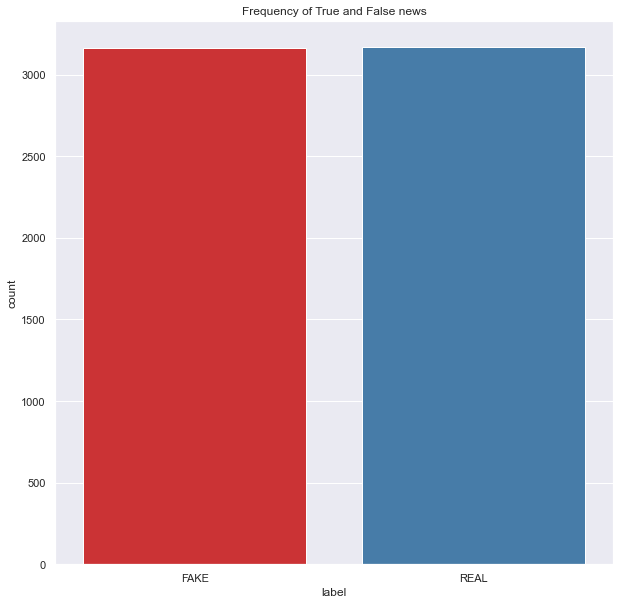

In [43]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.rcParams['figure.figsize'] = [10, 10]#setting the rcParams for all plots.
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.countplot(data=df, x='label', palette='Set1').set(title='Frequency of True and False news')
plt.show()

The above plot shows that the fake and real news are of same proportion. The data is clean to a degree.

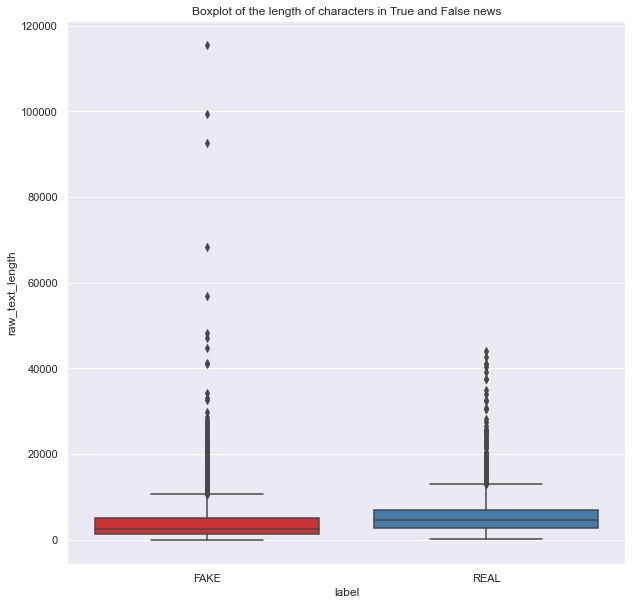

In [44]:
df['raw_text_length'] = df['text'].apply(lambda x: len(x))
sns.boxplot(y='raw_text_length', x='label', data=df, palette="Set1").set(title='Boxplot of the length of characters in True and False news')
plt.show()

The median length of the fake news articles' characters is lower than that of the real (or true) news. But, both have zero length with loads of outliers.



In [45]:
df.describe()
df

,Unnamed: 0,title,text,label,raw_text_length
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,7518
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,2646
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,2543
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,2660
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1840
...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,4076
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,14323
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,11974
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,6991


In [46]:
df.isnull().sum()

Unnamed: 0         0
title              0
text               0
label              0
raw_text_length    0
dtype: int64

With the above output the data has no missing value.